# HW Week 3) Call to Action

*ANLT-224-01 Spring 2021*

*Jiye Lyu*

*02/06/2021*

# Objective

Do aliens really exist? This is a very mysterious and attractive question to all the human beings. UFO sightings are random and attractive, how can we meet it?

If you are curious about alien and want to witness UFO sightings, this report will provide historical states and cities that have most UFO sightings happened. And it will also tell you which period of time during a day has a big probability of meeting UFO sightings. The data is based on UFO sightings from 1969 to 2019 in North America.

# Data mining

## Read json data.

This json can't be read by "load", so I use "with open" and read by line to get the content.

In [1]:
import json
with open("nuforc_reports.json","r",encoding="utf-8") as ufo_data:
    UFO=[]
    for line in ufo_data.readlines():
        lines=json.loads(line)
        UFO.append(lines)

In [2]:
UFO[0].keys()

dict_keys(['text', 'stats', 'date_time', 'report_link', 'city', 'state', 'shape', 'duration', 'summary', 'posted'])

## Data clean and seperate

I want to analyze "shape","state","city" and "date_time". So I only filter those items that has these elements. 

Then I want to store different data by year. So I get "date_time" and replace "/" and ":" with " ". Then I split them accroding to " ". Now the date is seperated as 5 parts. Month, day, year, hour and minutes. So I use "try" and "if" to filter different data by year. "year" is string  now, so I use int() to convert it as a numeric. And numeric value can be used in if statement.

I store data with different years in different lists called "Data70", "Data80"...etc. There is a list called Specific_time.It will be used in the following steps to known which period of time during a day has a big probability of meeting UFO sightings.

In [3]:
Data70=[]
Data80=[]
Data90=[]
Data00=[]
Data10=[]

Specific_time=[]

for i in range(len(UFO)):
    
    if (UFO[i]["state"]!=None and UFO[i]["city"]!=None and UFO[i]["shape"]!=None and UFO[i]["date_time"]!=None):
        try:

            data=UFO[i]["date_time"]
            data=data.replace("/" ," ")
            data=data.replace(":" ," ")
            data=data.split(" ")

            if (int(data[2])>=69 and int(data[2])<79):
                Specific_time.append(data)
                Data70.append(UFO[i])

            elif (int(data[2])>=79 and int(data[2])<89):
                Specific_time.append(data)
                Data80.append(UFO[i])

            elif (int(data[2])>=89 and int(data[2])<99):
                Specific_time.append(data)
                Data90.append(UFO[i])

            elif (int(data[2])>=99):
                Specific_time.append(data)
                Data00.append(UFO[i])

            elif (int(data[2])>=0 and int(data[2])<9):
                Specific_time.append(data)
                Data00.append(UFO[i])

            elif (int(data[2])>=9 and int(data[2])<=19):
                Specific_time.append(data)
                Data10.append(UFO[i])

            else:
                continue

        except:
            continue

## Shape

In this part I use for loop to add shapes in a list called "Shape[]".


In [4]:
Shape=[]
for i in range(len(UFO)):
    try:
        Shape.append(UFO[i]["shape"])
    except:
        continue

There is a function called Counter that can find categories and counts of elements in a list. So I cann get the number of UFO sightings in different shapes.

In [5]:
from collections import Counter

Shape_result = Counter(Shape)
Shape_S=sorted(Shape_result.items(),key=lambda x:x[1],reverse=True)
Shape_S[0:5]

[('Light', 18230),
 ('Circle', 10130),
 ('Triangle', 7909),
 ('Fireball', 7095),
 ('Unknown', 6182)]

In [6]:
shape_cat=[]
numbers_shape=[]
for i in range(len(Shape_S)):
    shape_cat.append(Shape_S[i][0])
    numbers_shape.append(Shape_S[i][1])

I make a plot about the number of UFO sightings in different shapes.

D:\Anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


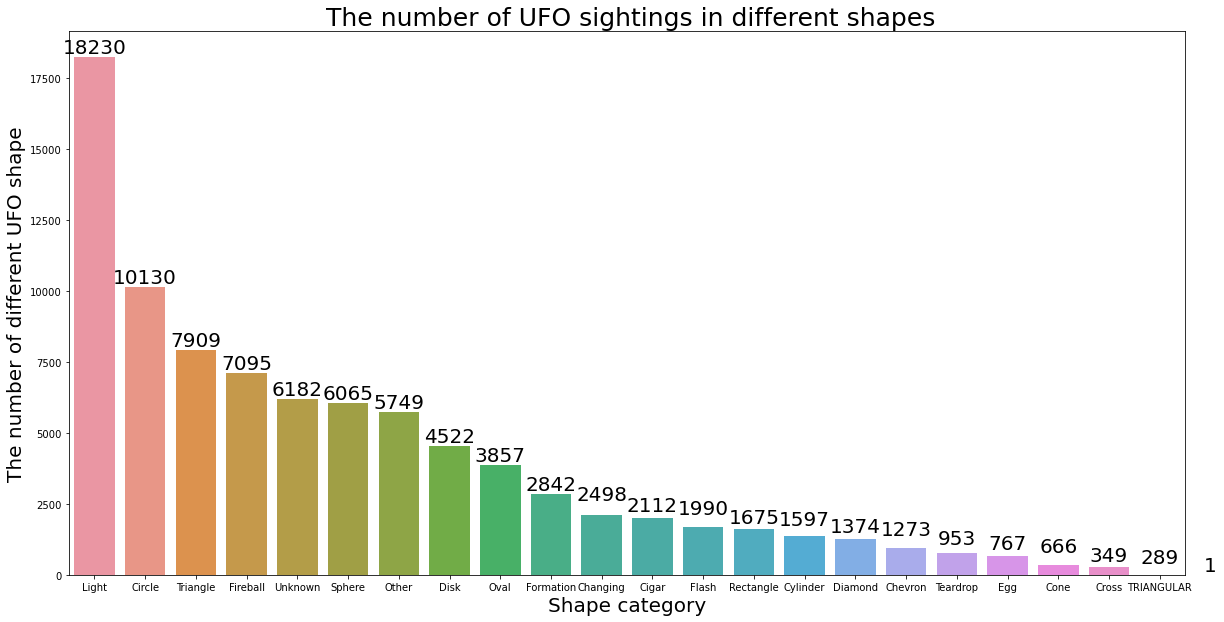

In [7]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import seaborn as sns

plt.figure(figsize=(20,10))
sns.barplot(shape_cat,numbers_shape)
plt.ylabel("The number of different UFO shape",fontsize=20)
plt.xlabel("Shape category",fontsize=20)
plt.title(" The number of UFO sightings in different shapes",fontsize=25)
for i in range(len(Shape_S)):
    plt.text(i, numbers_shape[i],numbers_shape[i] ,ha='center',va= 'bottom', size = 20, alpha = 1)

plt.show()

## Specific time

In this part I want to find which period of time during a day has a big probability of meeting UFO sightings. So I seperate one day into four parts. "0:00-6:00","6:00-12:00","12:00-18:00" and "18:00-24:00". So I only need to compare position 3 item with 0,6,12,18 by using for loop and if statement.

In [8]:
Specific_time[0:10]

[['12', '12', '19', '18', '43'],
 ['3', '22', '19', '18', '30'],
 ['4', '17', '19', '02', '00'],
 ['3', '15', '09', '18', '00'],
 ['4', '2', '19', '20', '25'],
 ['5', '1', '19', '11', '00'],
 ['4', '10', '19', '17', '00'],
 ['7', '14', '73', '22', '00'],
 ['6', '18', '19', '21', '00'],
 ['6', '12', '19', '22', '00']]

In [9]:
Time0_6=0
Time6_12=0
Time12_18=0
Time18_0=0

for i in range(len(Specific_time)):
    try:
        if (int(Specific_time[i][3])>=0 and int(Specific_time[i][3])<6):
            Time0_6+=1
        if int(Specific_time[i][3])>=6 and int(Specific_time[i][3])<12:
            Time6_12+=1
        if int(Specific_time[i][3])>=12 and int(Specific_time[i][3])<18:
            Time12_18+=1
        else:
            Time18_0+=1
            
    except:
            continue

In [10]:
UFO_sightings_in_different_time=(Time0_6,Time6_12,Time12_18,Time18_0)
Time_period=["0:00-6:00","6:00-12:00","12:00-18:00","18:00-24:00"]

I make a plot about UFO Sightings in different time periods.

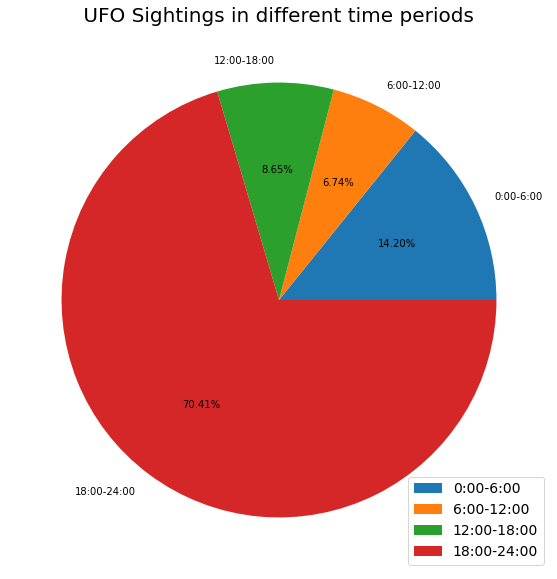

In [11]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import seaborn as sns

pie_plot=plt.figure(figsize=(10,10))
plt.pie(x=UFO_sightings_in_different_time, labels=Time_period, autopct='%1.2f%%')
plt.title(" UFO Sightings in different time periods ",fontsize=20)
plt.legend(loc=4,fontsize=14)

plt.show()

## UFO Sightings in different years

This part shows the Number of UFO Sightings in "1969-1979","1980-1989","1990-1999","2000-2009" and "2010-2019".

D:\Anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

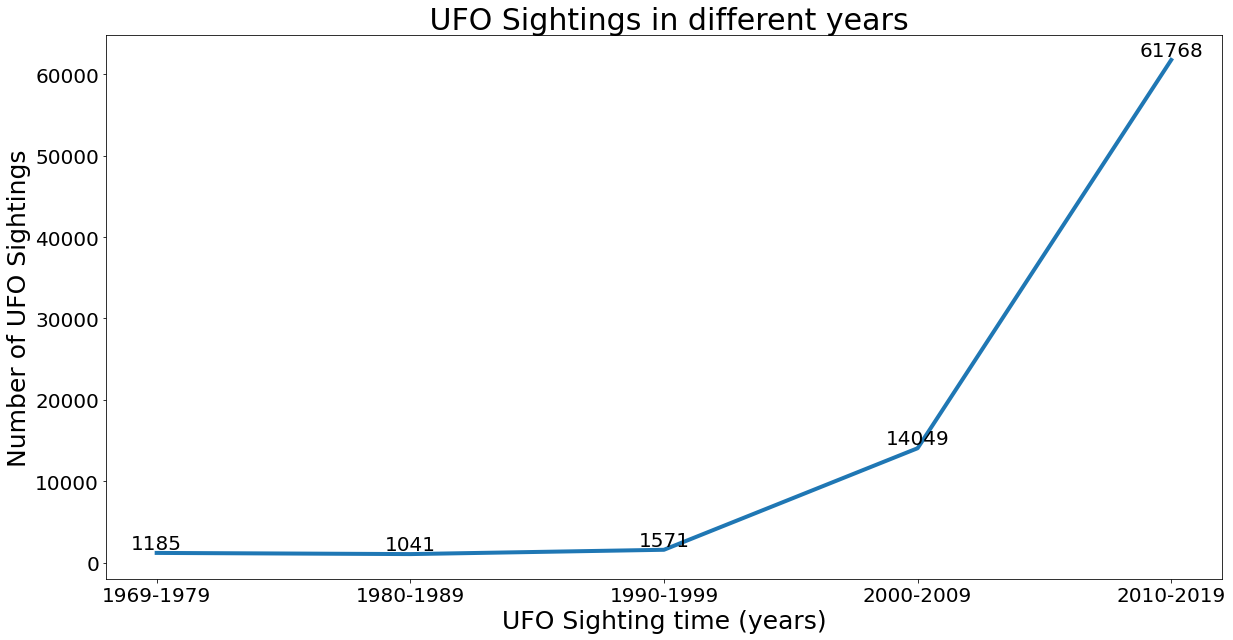

In [12]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import seaborn as sns

plt.figure(figsize=(20,10))
UFO_Times=[len(Data70), len(Data80), len(Data90), len(Data00), len(Data10)]
UFO_Years=["1969-1979","1980-1989","1990-1999","2000-2009","2010-2019"]
plt.figure(figsize=(20,10))

sns.lineplot(UFO_Years,UFO_Times,linewidth=4)

plt.ylabel("Number of UFO Sightings",fontsize=25)
plt.xlabel("UFO Sighting time (years)",fontsize=25)
plt.title(" UFO Sightings in different years",fontsize=30)
plt.tick_params(axis='both', labelsize=20) #This conde is used to set the coordinate scale size

for i in range(len(UFO_Times)):
    plt.text(i, UFO_Times[i],UFO_Times[i] ,ha='center',va= 'bottom', size = 20, alpha = 1)

plt.show()

## Cities and States where are frequent UFO sightings between 1969-1979.

In this part I get cities and states in differernt years. Then I sort the keys by descent dictionary value and show top 5(for i in range(5)) values with keys.

In [13]:
region70=[]
city70=[]
for i in range(len(Data70)):

    try:
        region70.append(Data70[i]["state"])
        city70.append(Data70[i]["city"])
    except:
        continue

In [14]:
from collections import Counter

Region_result70 = Counter(region70)
City_result70=Counter(city70)

In [15]:
City70_S=sorted(City_result70.items(),key=lambda x:x[1],reverse=True)
City70_S[0:5]

[('Houston', 6),
 ('Los Angeles', 6),
 ('Springfield', 5),
 ('Miami', 5),
 ('Portland', 5)]

In [16]:
State70_S=sorted(Region_result70.items(),key=lambda x:x[1],reverse=True)
State70_S[0:5]

[('CA', 120), ('TX', 73), ('NY', 67), ('PA', 56), ('FL', 56)]

### City

In [17]:
city_names70=[]
sightings_city70=[]
for i in range(5):
    city_names70.append(City70_S[i][0])
    sightings_city70.append(City70_S[i][1])

In [18]:
city_names70

['Houston', 'Los Angeles', 'Springfield', 'Miami', 'Portland']

In [19]:
sightings_city70

[6, 6, 5, 5, 5]

### State

In [20]:
state_names70=[]
sightings_state70=[]
for i in range(5):
    state_names70.append(State70_S[i][0])
    sightings_state70.append(State70_S[i][1])

In [21]:
state_names70

['CA', 'TX', 'NY', 'PA', 'FL']

In [22]:
sightings_state70

[120, 73, 67, 56, 56]

I make a function to make two plots with cities and states about UFO Sightings in different time periods.

In [23]:
def make_a_plot(city_names,sightings_city,state_names,sightings_state):
    plt.figure(figsize=(40,40))

    plt.subplot(222)
    plt.bar(state_names,sightings_state)
    plt.ylabel("Number of UFO Sightings",fontsize=30)
    plt.xlabel("UFO Sighting States",fontsize=30)
    plt.title(" Top 5 UFO Sighting States",fontsize=50)
    plt.tick_params(axis='both', labelsize=30)

    for i in range(len(state_names)):
        plt.text(i, sightings_state[i],sightings_state[i] ,ha='center',va= 'bottom', size = 40, alpha = 1)

    plt.subplot(221)
    plt.bar(city_names,sightings_city)
    plt.ylabel("Number of UFO Sightings",fontsize=30)
    plt.xlabel("UFO Sighting time (years)",fontsize=30)
    plt.title("Top 5 UFO Sighting Cities",fontsize=50)
    plt.tick_params(axis='both', labelsize=30)

    for i in range(len(city_names)):
        plt.text(i, sightings_city[i],sightings_city[i] ,ha='center',va= 'bottom', size = 40, alpha = 1)


    plt.show()

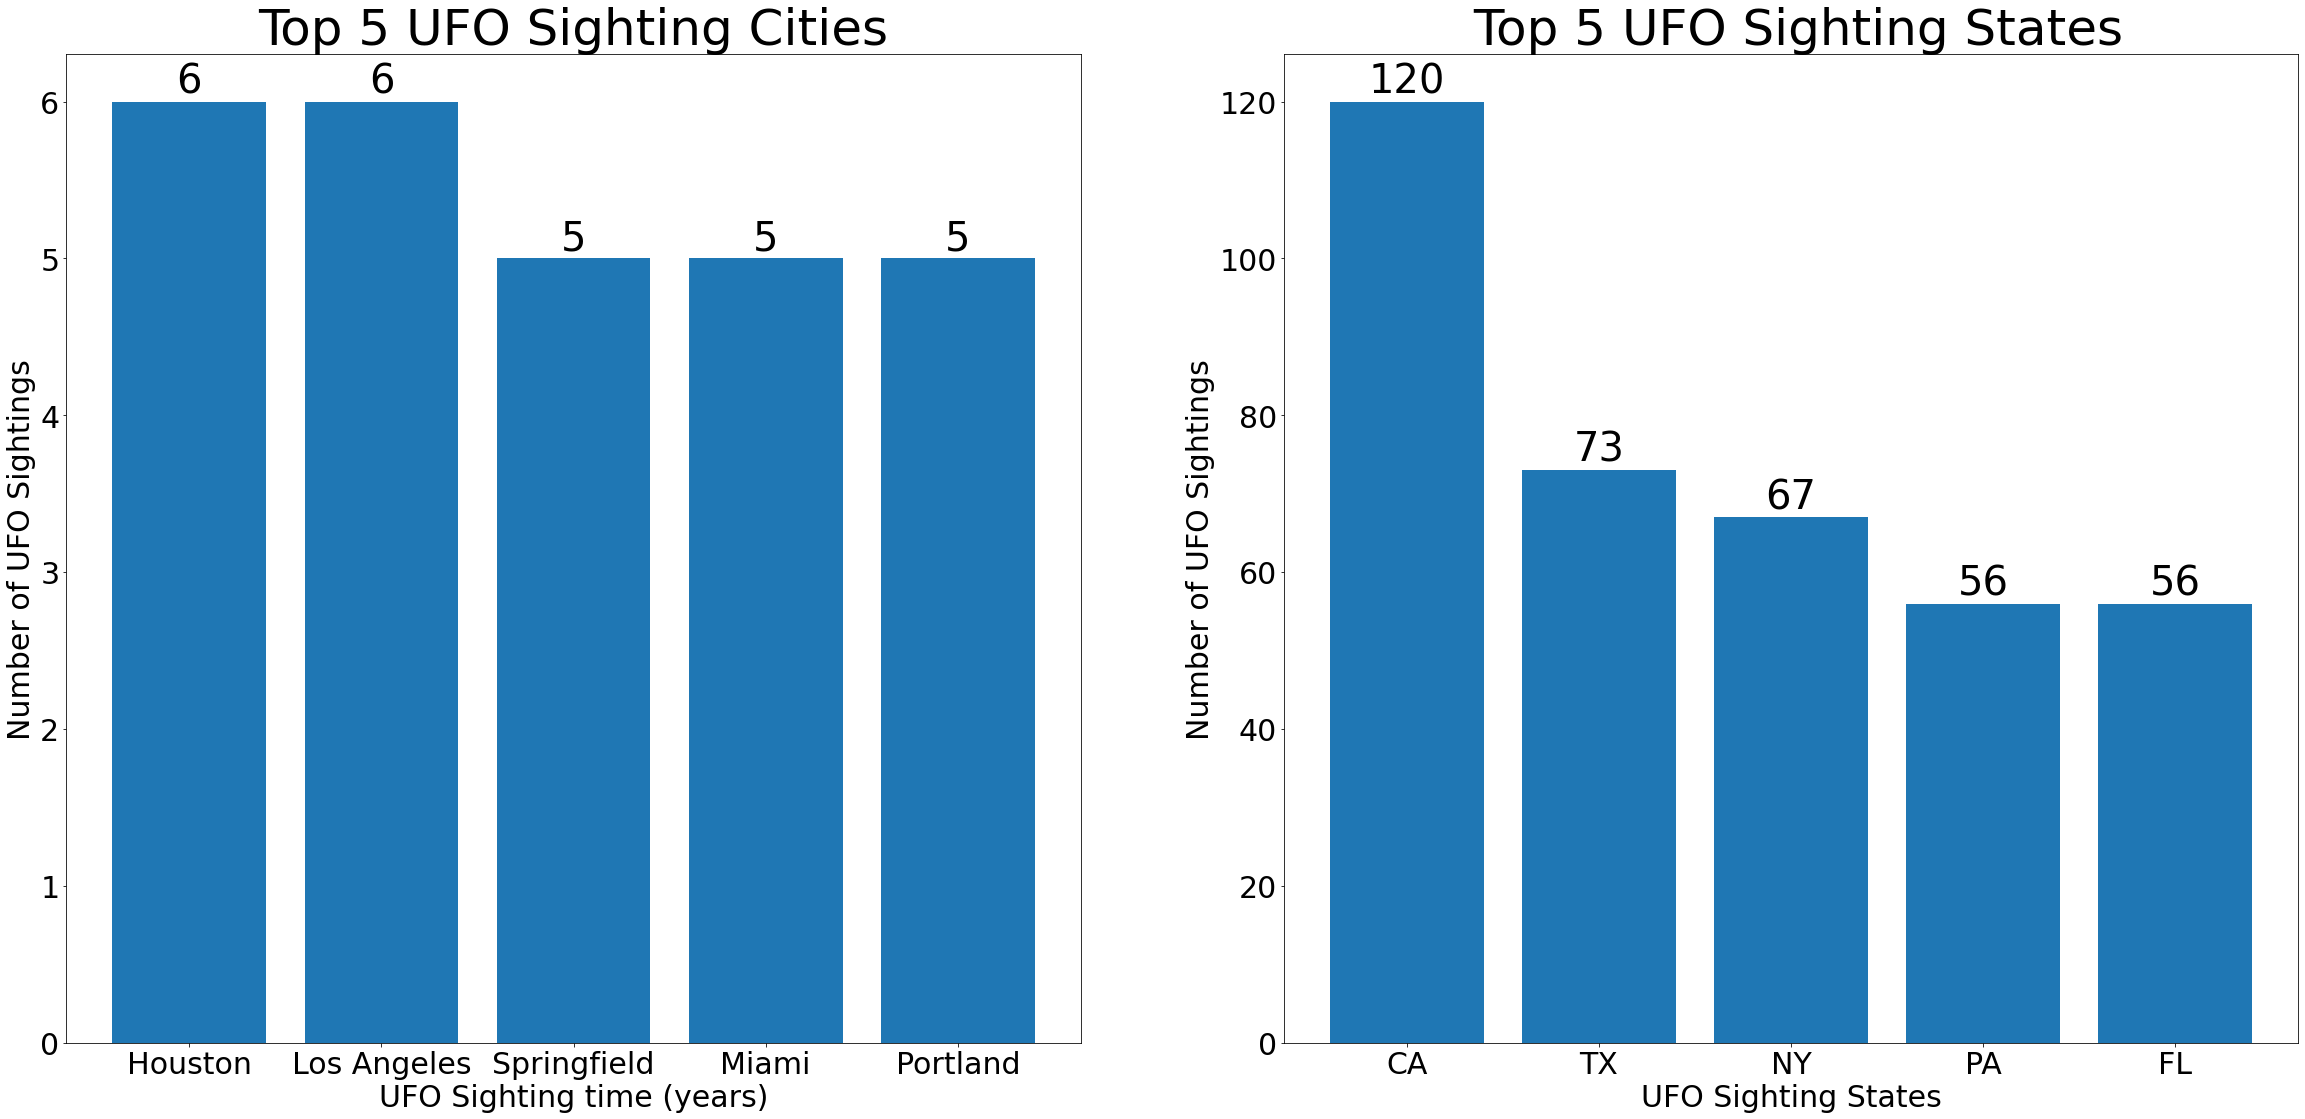

In [24]:
make_a_plot(city_names70,sightings_city70,state_names70,sightings_state70)

## Cities and States where are frequent UFO sightings between 1980-1989.

In [25]:
region80=[]
city80=[]
for i in range(len(Data80)):
    try:
        region80.append(Data80[i]["state"])
        city80.append(Data80[i]["city"])
    except:
        continue

Region_result80 = Counter(region80)
City_result80=Counter(city80)

In [26]:
State80_S=sorted(Region_result80.items(),key=lambda x:x[1],reverse=True)
State80_S[0:5]

[('CA', 119), ('FL', 61), ('TX', 53), ('NY', 45), ('MI', 40)]

In [27]:
City80_S=sorted(City_result80.items(),key=lambda x:x[1],reverse=True)
City80_S[0:5]

[('Phoenix', 10),
 ('Albuquerque', 6),
 ('Virginia Beach', 6),
 ('Detroit', 6),
 ('Toronto (Canada)', 5)]

### City

In [28]:
city_names80=[]
sightings_city80=[]
for i in range(5):
    city_names80.append(City80_S[i][0])
    sightings_city80.append(City80_S[i][1])

### State

In [29]:
state_names80=[]
sightings_state80=[]
for i in range(5):
    state_names80.append(State80_S[i][0])
    sightings_state80.append(State80_S[i][1])

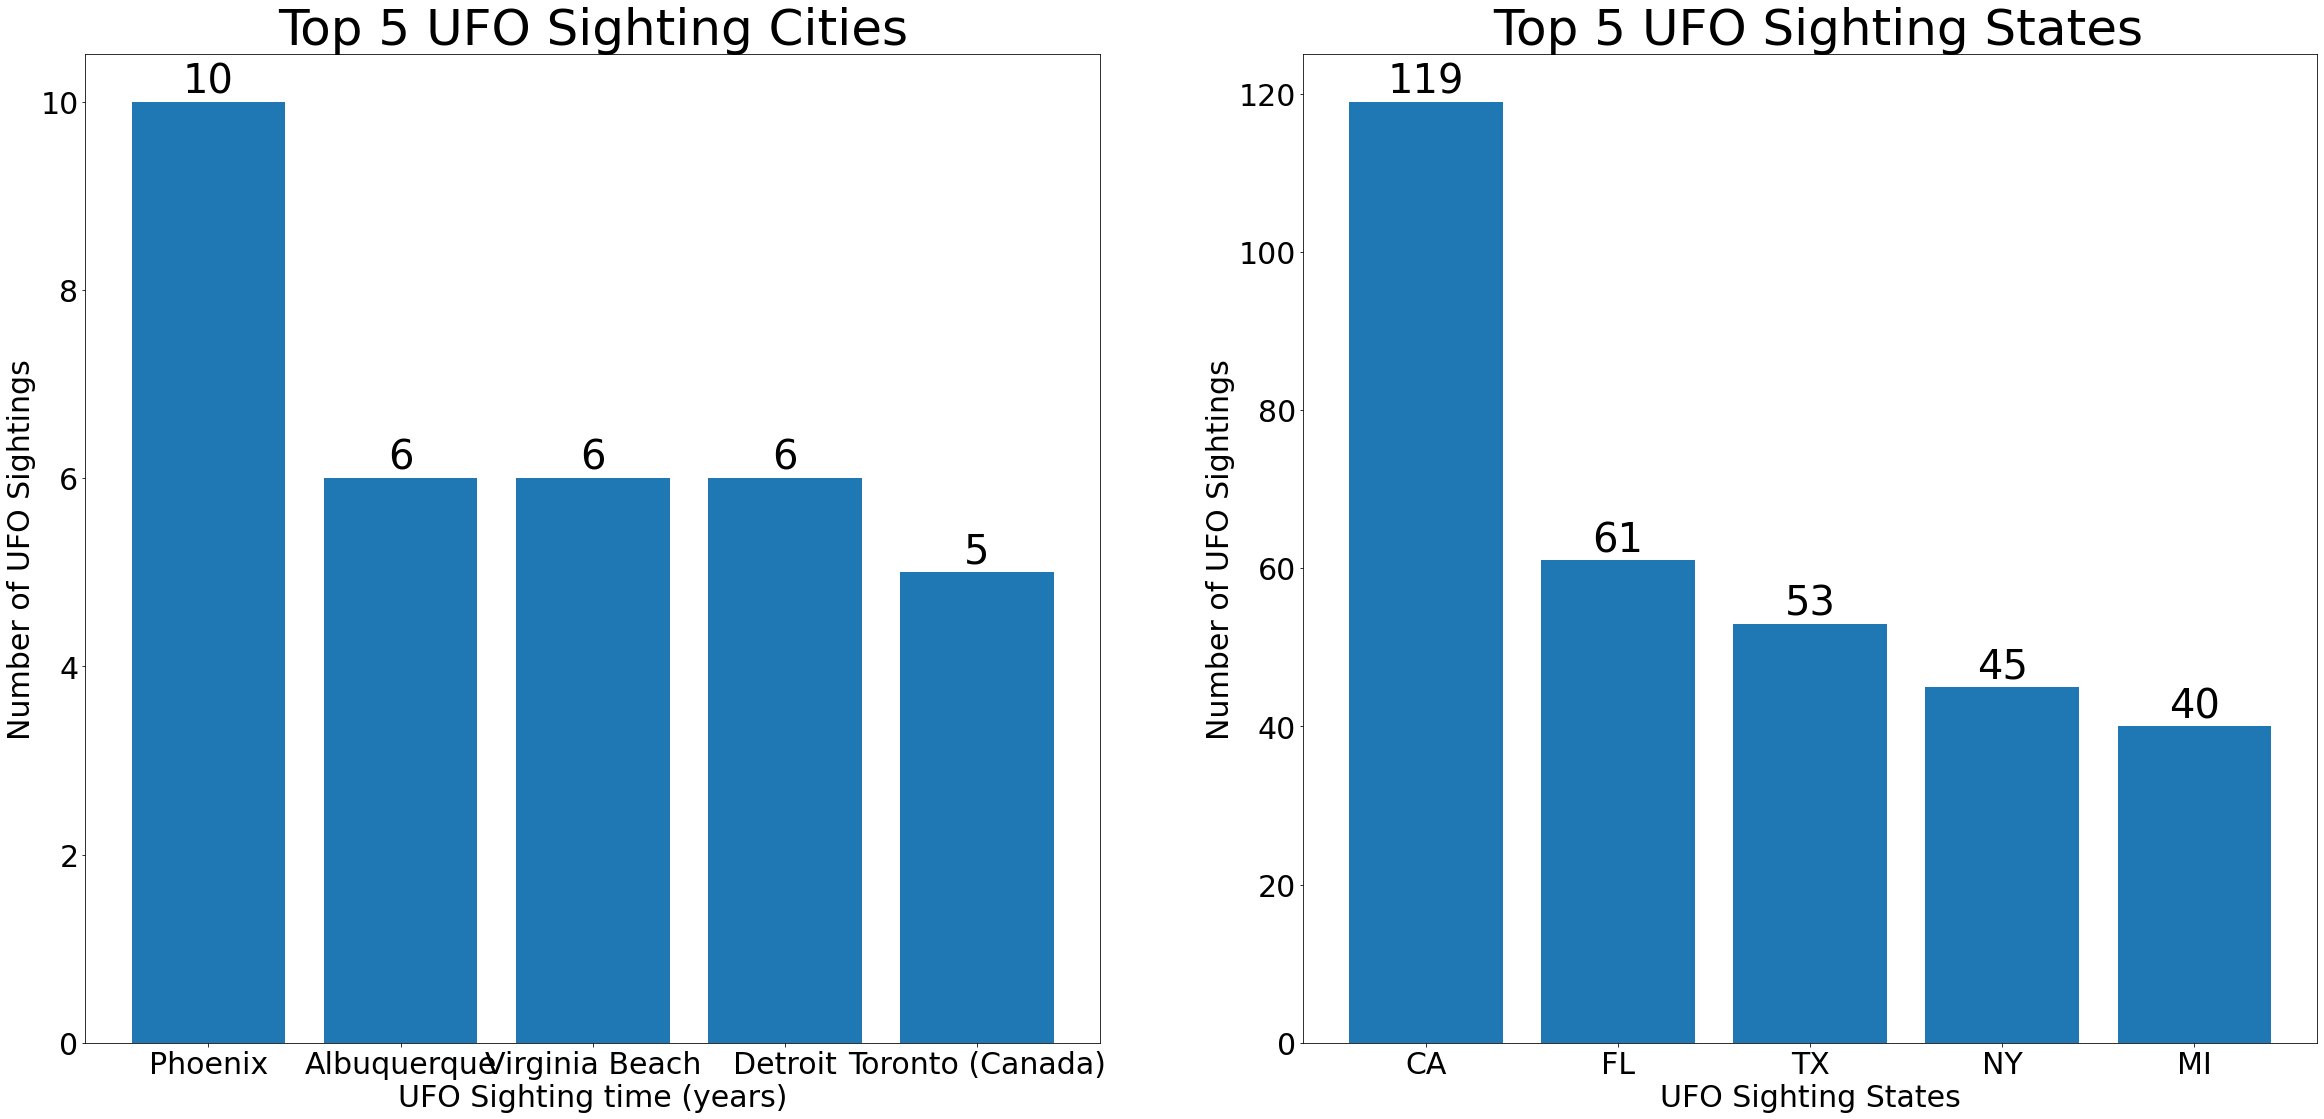

In [30]:
make_a_plot(city_names80,sightings_city80,state_names80,sightings_state80)

## Cities and States where are frequent UFO sightings between 1990-1999.

In [31]:
region90=[]
city90=[]
for i in range(len(Data90)):
    try:
        region90.append(Data90[i]["state"])
        city90.append(Data90[i]["city"])
    except:
        continue

Region_result90 = Counter(region90)
City_result90=Counter(city90)

In [32]:
State90_S=sorted(Region_result90.items(),key=lambda x:x[1],reverse=True)
State90_S[0:5]

[('CA', 208), ('NY', 94), ('AZ', 85), ('TX', 76), ('FL', 69)]

In [33]:
City90_S=sorted(City_result90.items(),key=lambda x:x[1],reverse=True)
City90_S[0:5]

[('Phoenix', 20),
 ('San Diego', 11),
 ('Los Angeles', 9),
 ('Portland', 8),
 ('Garden Grove', 8)]

### City

In [34]:
city_names90=[]
sightings_city90=[]
for i in range(5):
    city_names90.append(City90_S[i][0])
    sightings_city90.append(City90_S[i][1])

### State

In [35]:
state_names90=[]
sightings_state90=[]
for i in range(5):
    state_names90.append(State90_S[i][0])
    sightings_state90.append(State90_S[i][1])

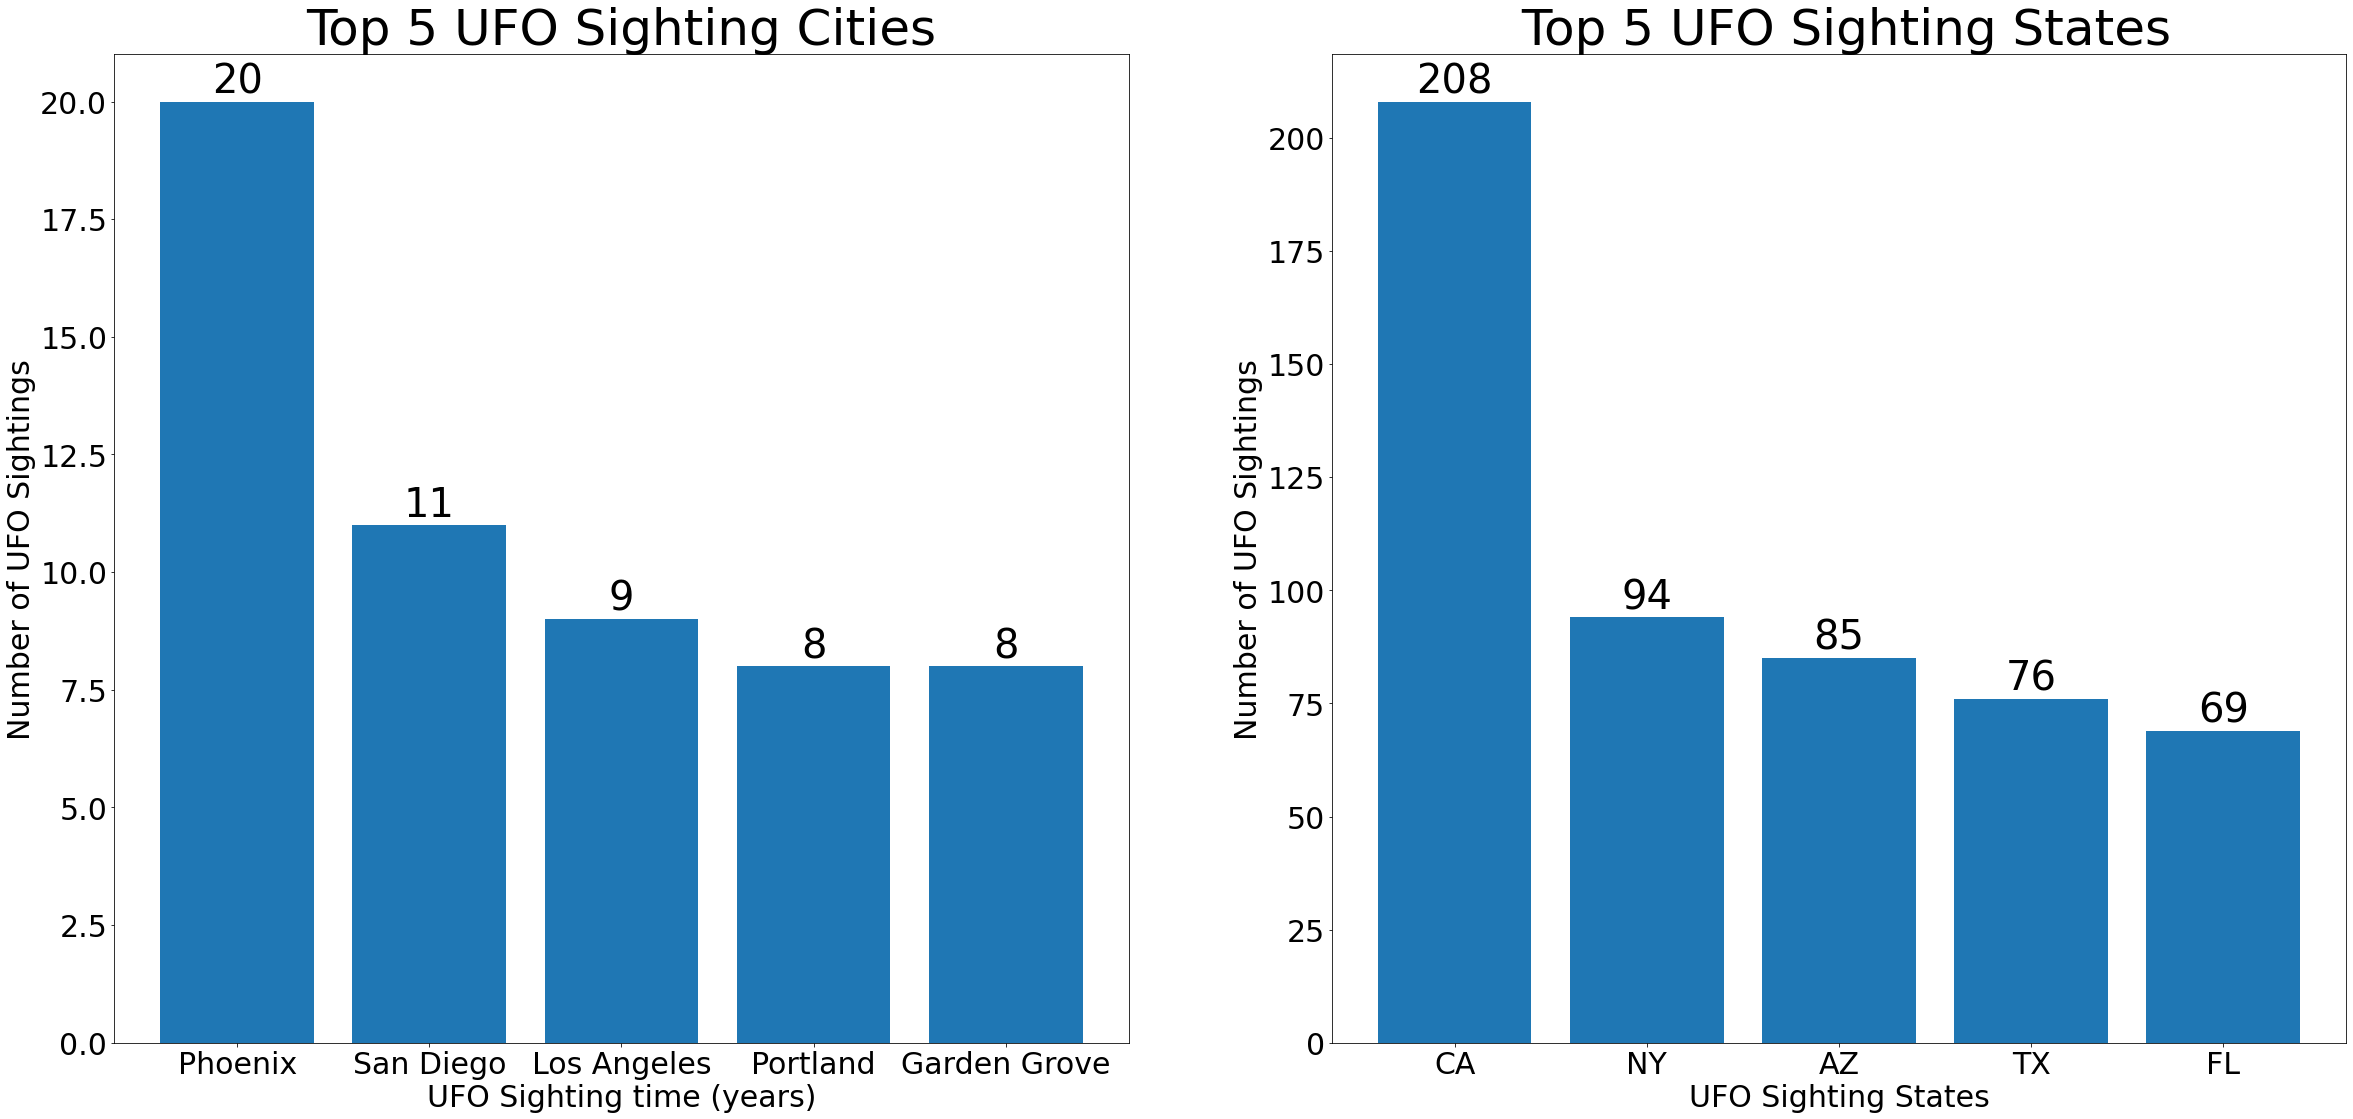

In [36]:
make_a_plot(city_names90,sightings_city90,state_names90,sightings_state90)

## Cities and States where are frequent UFO sightings between 2000-2009.

In [37]:
region00=[]
city00=[]
for i in range(len(Data00)):
    try:
        region00.append(Data00[i]["state"])
        city00.append(Data00[i]["city"])
    except:
        continue

Region_result00 = Counter(region00)
City_result00=Counter(city00)

In [38]:
State00_S=sorted(Region_result00.items(),key=lambda x:x[1],reverse=True)
State00_S[0:5]

[('CA', 1947), ('TX', 853), ('FL', 836), ('WA', 647), ('NY', 565)]

In [39]:
City00_S=sorted(City_result00.items(),key=lambda x:x[1],reverse=True)
City00_S[0:5]

[('Phoenix', 90),
 ('Los Angeles', 88),
 ('San Diego', 85),
 ('Seattle', 80),
 ('Las Vegas', 76)]

### City

In [40]:
city_names00=[]
sightings_city00=[]
for i in range(5):
    city_names00.append(City00_S[i][0])
    sightings_city00.append(City00_S[i][1])

### State

In [41]:
state_names00=[]
sightings_state00=[]
for i in range(5):
    state_names00.append(State00_S[i][0])
    sightings_state00.append(State00_S[i][1])

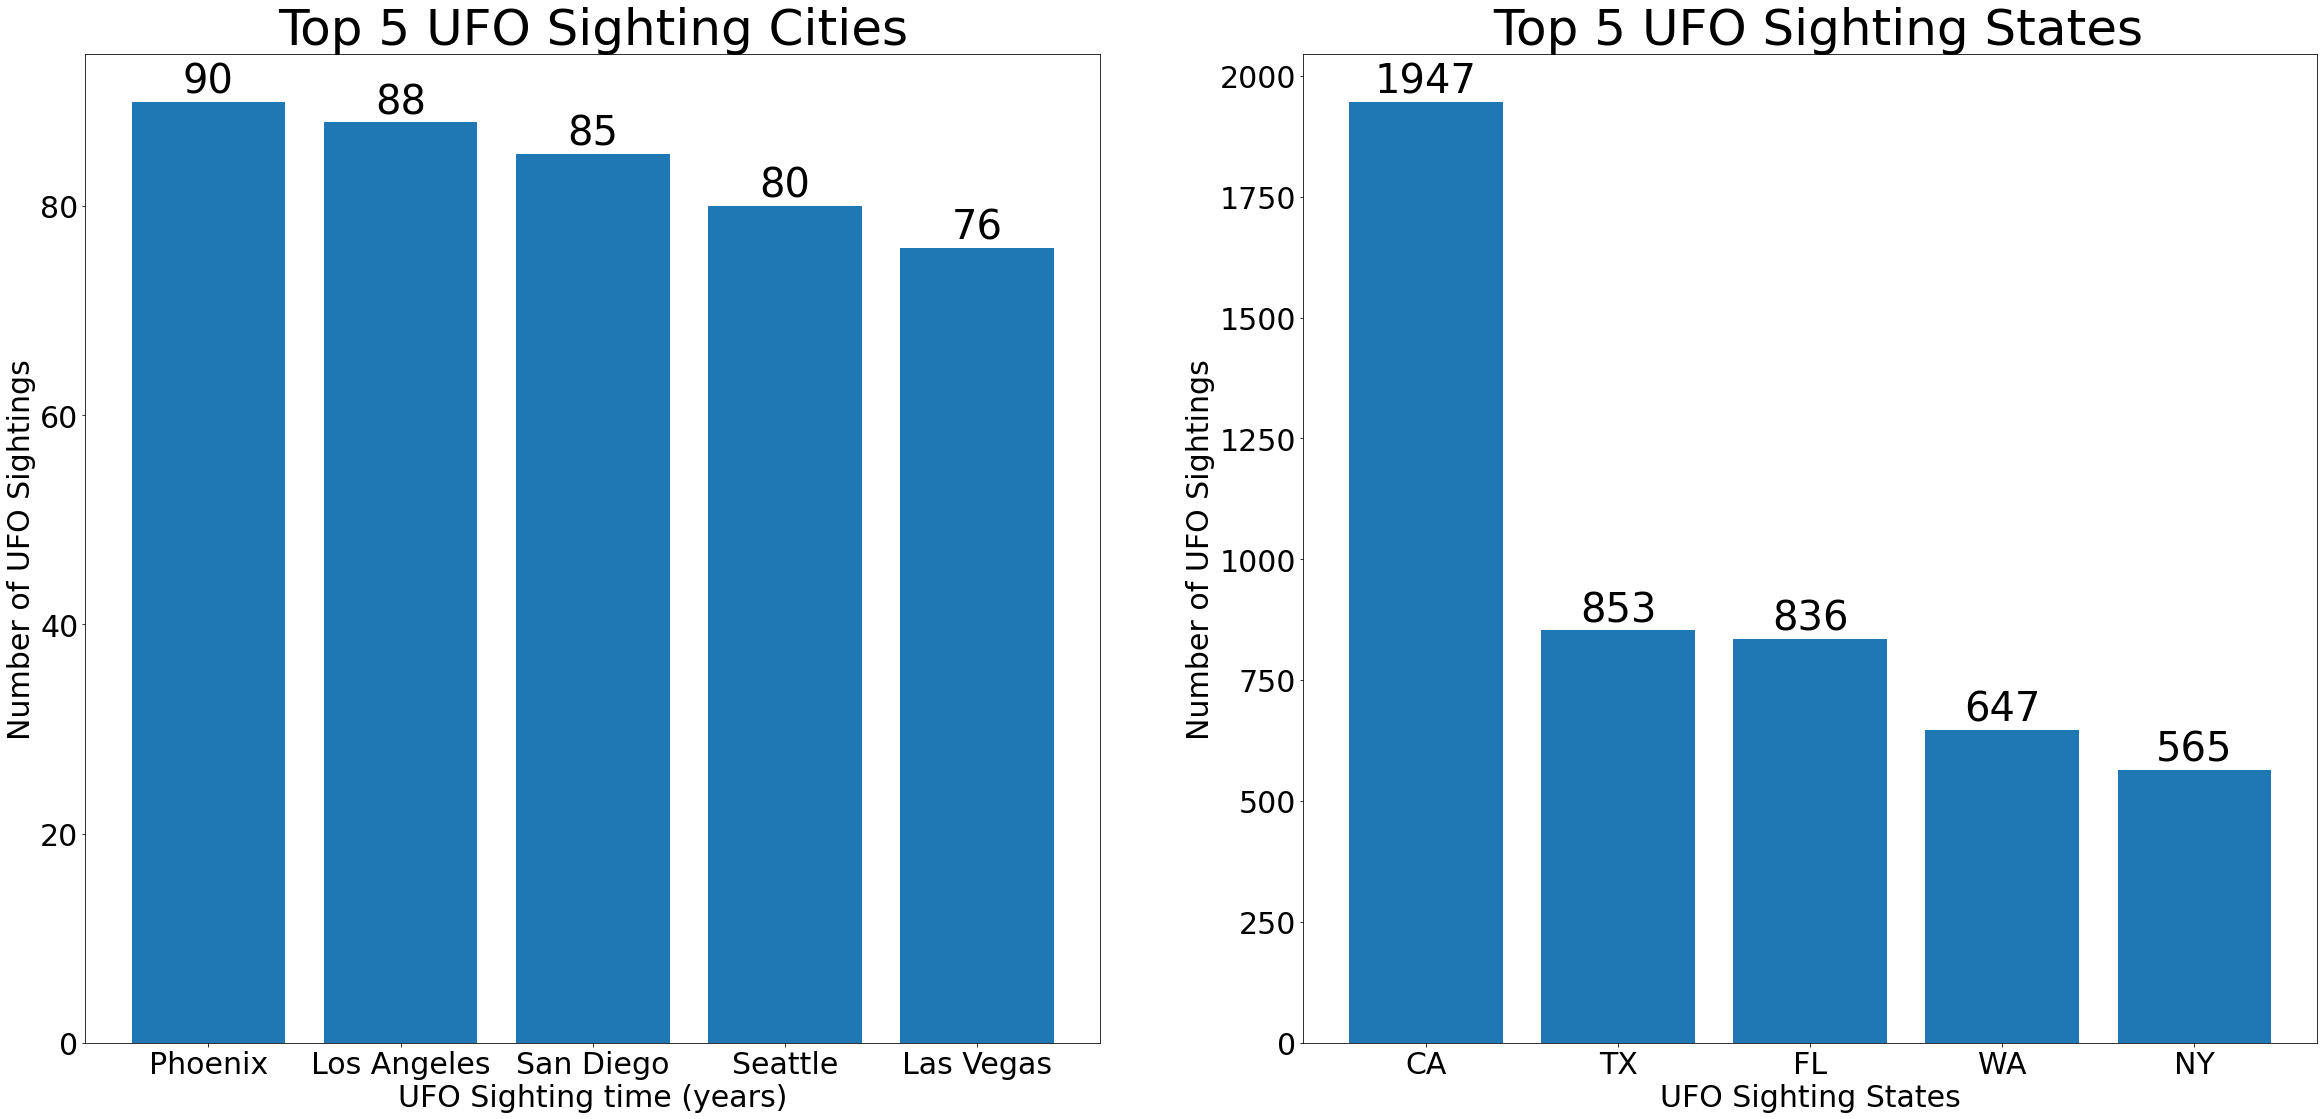

In [42]:
make_a_plot(city_names00,sightings_city00,state_names00,sightings_state00)

make_a_plot(city_names00,sightings_city00,state_names00,sightings_state00)

## Cities and States where are frequent UFO sightings between 2009-2019.

In [43]:
region10=[]
city10=[]

for i in range(len(Data10)):
    try:
        region10.append(Data10[i]["state"])
        city10.append(Data10[i]["city"])

    except:
        continue

Region_result10 = Counter(region10)
City_result10=Counter(city10)

In [44]:
State10_S=sorted(Region_result10.items(),key=lambda x:x[1],reverse=True)
State10_S[0:5]

[('CA', 6828), ('FL', 4074), ('WA', 2902), ('NY', 2522), ('PA', 2361)]

In [45]:
City10_S=sorted(City_result10.items(),key=lambda x:x[1],reverse=True)
City10_S[0:5]

[('Phoenix', 310),
 ('Las Vegas', 295),
 ('Portland', 285),
 ('Seattle', 262),
 ('San Diego', 216)]

## City

In [46]:
city_names10=[]
sightings_city10=[]
for i in range(5):
    city_names10.append(City10_S[i][0])
    sightings_city10.append(City10_S[i][1])

## State

In [47]:
state_names10=[]
sightings_state10=[]
for i in range(5):
    state_names10.append(State10_S[i][0])
    sightings_state10.append(State10_S[i][1])

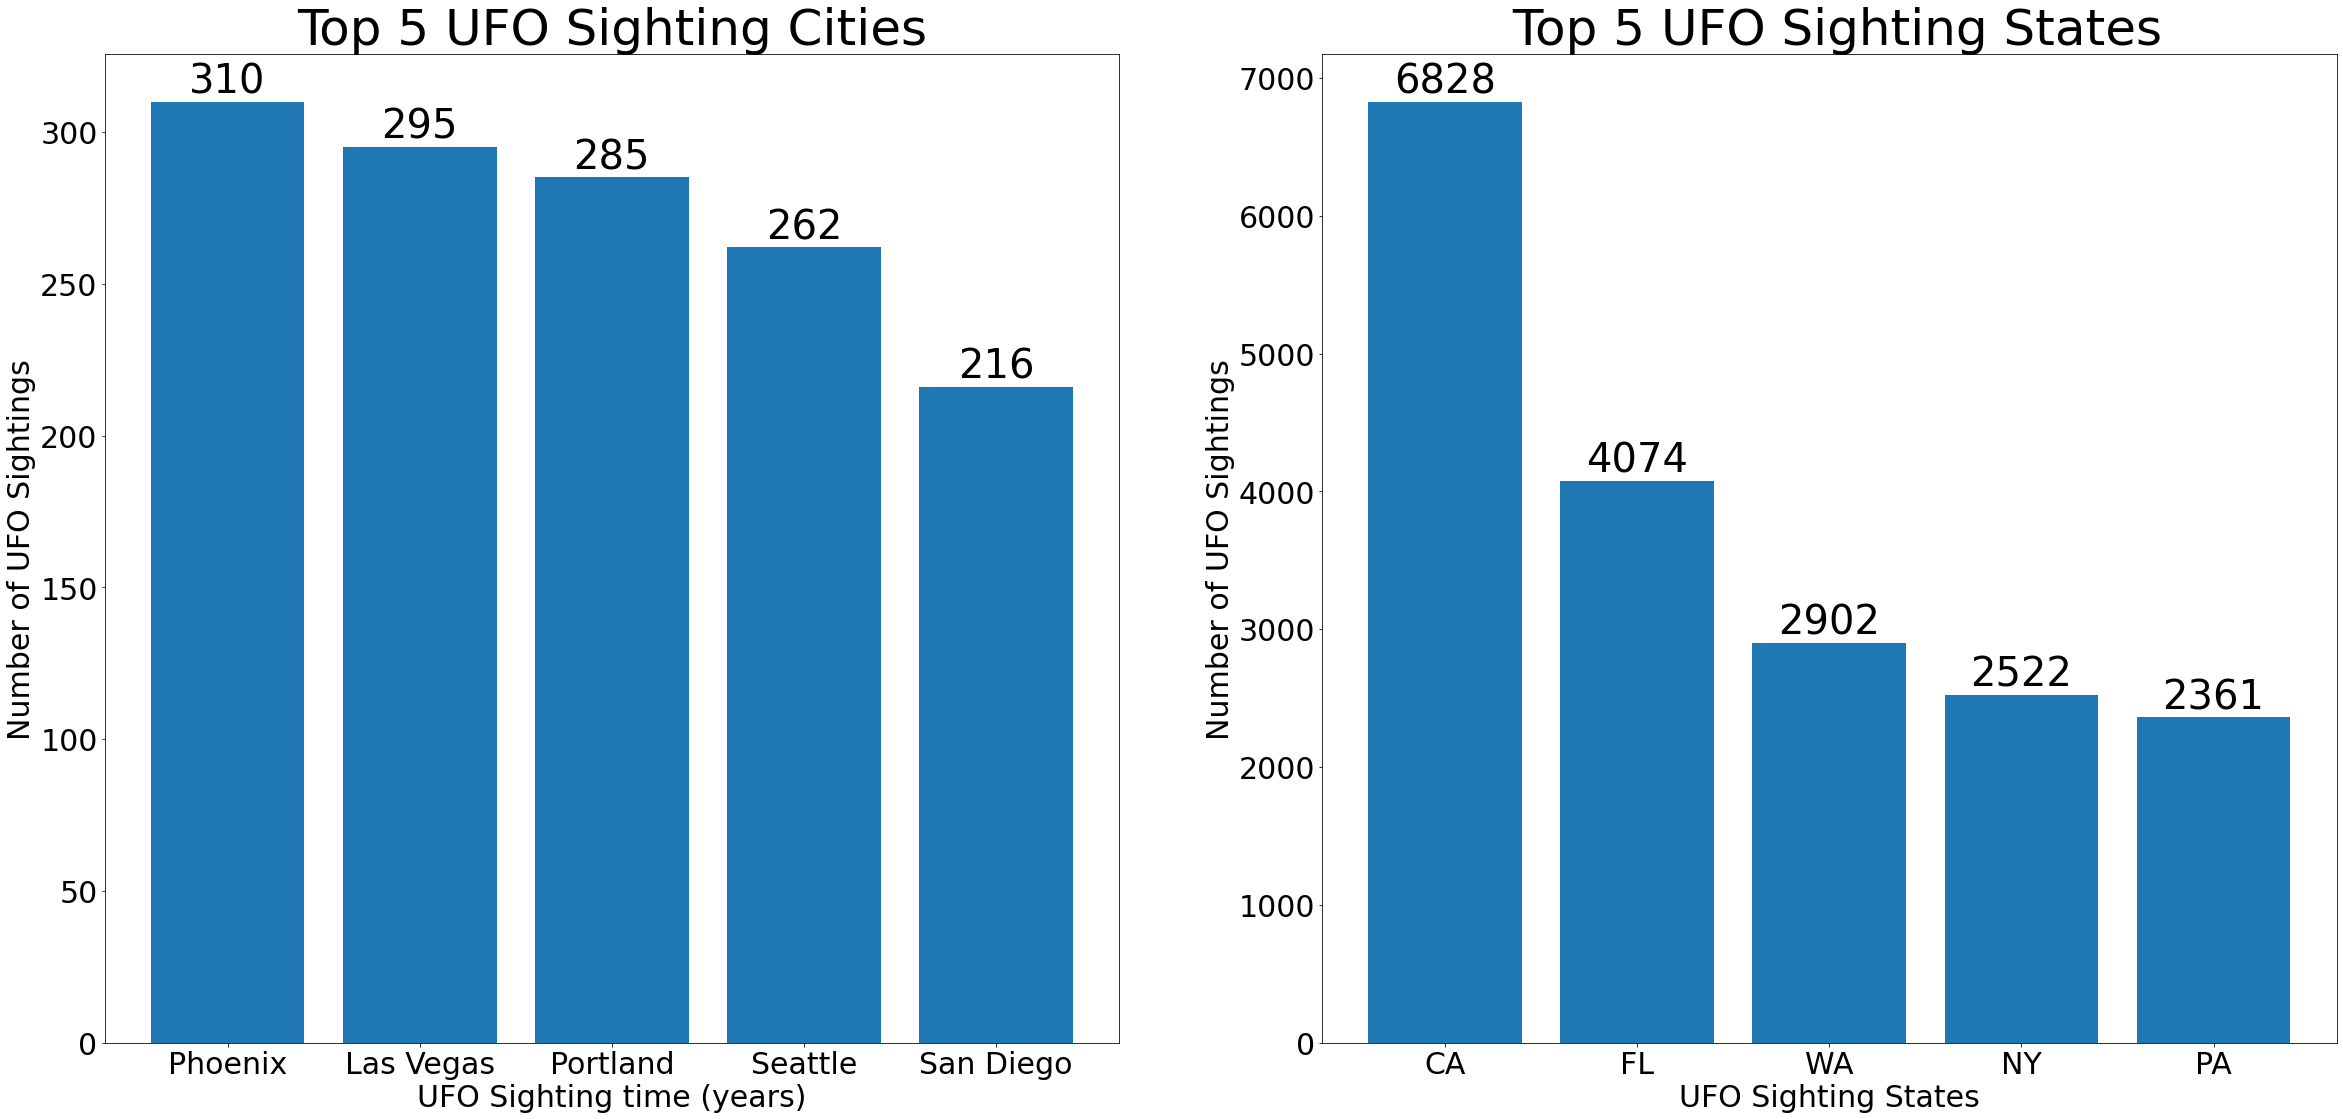

In [48]:
make_a_plot(city_names10,sightings_city10,state_names10,sightings_state10)

# Findings

**First:** The frequent shapes are 'Light', 'Circle', 'Triangle' and 'Fireball'.

**Second:** 70.41% UFO sightings happened in "18:00-24:00". And 14.20% UFO sightings happened in "0:00-6:00".

**Third:** UFO sightings increased sharply between 2009-2019.

**Forth:** The frequent shapes are 'Light', 'Circle', 'Triangle' and 'Fireball'.

**Fifth:** Between 1969 and 1979:

Top 5 cities : 'Houston', 'Los Angeles', 'Springfield', 'Miami'and  'Portland'.

Top 5 states : 'CA', 'TX', 'NY', 'PA' and  'FL'.

**Sixth:** Between 1980 and 1989:

Top 5 cities : 'Phoenix', 'Albuquerque', 'Virginia Beach', 'Detroit' and 'Toronto (Canada)'

Top 5 states : 'CA', 'FL', 'TX', 'NY' and  'MI'.


**Seventh:** Between 1990 and 1999:

Top 5 cities : 'Phoenix', 'San Diego', 'Los Angeles',  'Portland' and  'Garden Grove'.

Top 5 states : 'CA', 'NY',  'AZ', 'TX' and 'FL'.


**Eighth:** Between 2000 and 2009:

Top 5 cities : 'Phoenix', 'Los Angeles', 'San Diego', 'Seattle' and 'Las Vegas'.

Top 5 states : 'CA', 'TX', 'FL', 'WA' and  'NY'.

**Fifth:** Between 2010 and 2019:

Top 5 cities : 'Phoenix', 'Las Vegas', 'Portland', 'Seattle', 'San Diego'.

Top 5 states : 'CA', 'FL', 'WA', 'NY' and  'PA'.

# Recommendations

According what I found

**First:** I suggest adventurers go outside during "18:00-24:00", which has a high probability of witness UFO sightings.

**Second:** Though UFO sightings increased sharply between 2009-2019, it doesn't mean UFO come frequently. The big reason could be people have smart phone and it is easier to record UFO sightings. 

**Third:** If you have a chance to travel in California, Florida, Texas, Phoenix, Las Vegas, Los Angeles or San Diego, remember to look at the sky and see if there is a UFO lighting, UFO circle or UFO triangle in the sky. There is a good chance you will see UFO!!!